# Linear Models

In [1]:
import numpy as np
np.random.seed(90)

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model


%matplotlib inline

In [2]:
from chemml.datasets import load_organic_density
smiles, density, features = load_organic_density()


## Ordinary Linear Regression

In [3]:
x1 = features['AMW'].values.reshape(-1,1)
# print (x1.shape)
y1 = density.values.reshape(-1,1)
# print (y1.shape)

In [4]:
lr1 = linear_model.LinearRegression()
lr1.fit(x1, y1)
print ('training R2: ', lr1.score(x1,y1))


training R2:  0.664118398605855


In [5]:
print('density =', lr1.coef_[0][0],'* AMW', '+', lr1.intercept_[0])

density = 56.87066663280952 * AMW + 766.9044732961527


In [6]:
density.describe()

,density_Kg/m3
count,500.000000
mean,1268.838380
std,90.310547
min,1005.600000
25%,1207.170000
50%,1264.460000
75%,1327.352500
max,1614.830000


Text(0, 0.5, 'density (kg/m^3)')

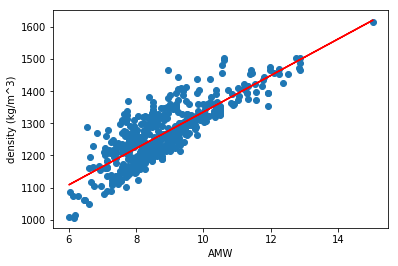

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1, y1)
ax.plot(x1, lr1.predict(x1), color='red')
ax.set_xlabel('AMW')
ax.set_ylabel('density (kg/m^3)')

## Multivariate regression

In [8]:
x1 = features[['AMW','nC']]
print (x1.shape)
y1 = density.values.reshape(-1,1)
print (y1.shape)

(500, 2)
(500, 1)


In [9]:
lr1 = linear_model.LinearRegression()
lr1.fit(x1, y1)
print ('training R2: ', lr1.score(x1,y1))


training R2:  0.7609109400380928


In [10]:
print('density =', lr1.coef_[0][0],'* AMW', '+', lr1.coef_[0][1],'* nC', '+', lr1.intercept_[0])

density = 47.48891175777278 * AMW + -7.122488873051298 * nC + 969.6494661618453


## Robust regression to control outliers

In [53]:
x1 = features['AMW'].values.reshape(-1,1)
# print (x1.shape)
y1 = density.values.reshape(-1,1)
# print (y1.shape)

In [54]:
lr1 = linear_model.LinearRegression()
lr1.fit(x1, y1)
print ('ordinary: training R2: ', lr1.score(x1,y1))


ransac = linear_model.RANSACRegressor()
ransac.fit(x1,y1)
print ('ransac: training R2: ', ransac.score(x1,y1))


ordinary: training R2:  0.664118398605855
ransac: training R2:  0.5920999327550278


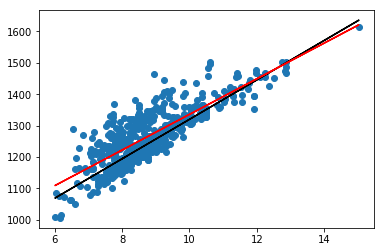

In [56]:
plt.scatter(x1, y1)
plt.plot(x1, ransac.predict(x1), color='black')
plt.plot(x1, lr1.predict(x1), color='red')

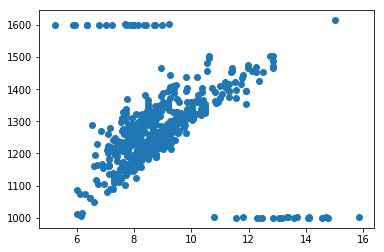

In [66]:
x1 = features['AMW'].values.reshape(-1,1)
y1 = density.values.reshape(-1,1)

x_outlier1 = np.random.randn(20,1) + 7
y_outlier1 = np.random.randn(20,1) + 1600

x_outlier2 = np.random.randn(20,1) + 13
y_outlier2 = np.random.randn(20,1) + 1000

x1 = np.concatenate((x1,x_outlier1, x_outlier2), axis=0)
y1 = np.concatenate((y1,y_outlier, y_outlier2), axis=0)

plt.scatter(x1,y1)

In [68]:
lr1 = linear_model.LinearRegression()
lr1.fit(x1, y1)

ransac = linear_model.RANSACRegressor()
ransac.fit(x1,y1)


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_threshold=None,
        stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

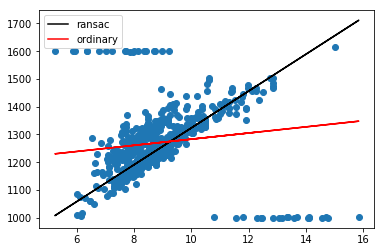

In [74]:
plt.scatter(x1, y1)
plt.plot(x1, ransac.predict(x1), color='black', label='ransac')
plt.plot(x1, lr1.predict(x1), color='red', label='ordinary')
plt.legend()

## Avoid overfitting: regularization 

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [76]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30

x2 = np.sort(np.random.rand(n_samples))
y2 = true_fun(x2) + np.random.randn(n_samples) * 0.1
x2 = x2.reshape(-1,1)
y2 = y2.reshape(-1,1)

print (x2.shape, y2.shape)

(30, 1) (30, 1)


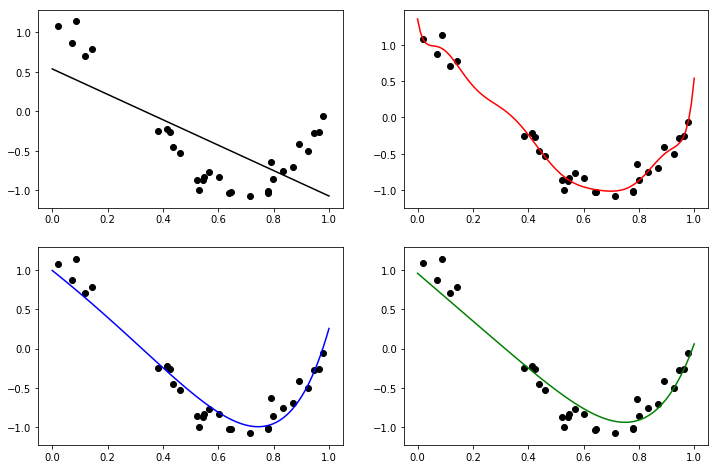

In [77]:
lrmodel = linear_model.LinearRegression()
lrmodel.fit(x2,y2)

polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
lrmodel1 = linear_model.LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", lrmodel1)])
pipeline.fit(x2,y2)
# fit ridge regression model on expanded features
ridge = linear_model.Ridge(alpha=.1)
pipeline1 = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge)])
pipeline1.fit(x2,y2)

lasso = linear_model.Lasso(alpha=0.01)
pipeline2 = Pipeline([("polynomial_features", polynomial_features),
                     ("lasso_regression", lasso)])
pipeline2.fit(x2,y2)

# plot the fitted lines
# X_all = np.linspace(200, 500, 100)
X_all = np.linspace(0, 1, 100)

fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot(X_all, lrmodel.predict(X_all[:, np.newaxis]),color='k',label='')
plt.scatter(x2,y2, c='k', label='data')
plt.subplot(2,2,2)
plt.plot(X_all, pipeline.predict(X_all[:, np.newaxis]),color='r')
plt.scatter(x2,y2, c='k', label='data')
plt.subplot(2,2,3)
plt.plot(X_all, pipeline1.predict(X_all[:, np.newaxis]),color='b')
plt.scatter(x2,y2, c='k', label='data')
plt.subplot(2,2,4)
plt.plot(X_all, pipeline2.predict(X_all[:, np.newaxis]),color='g')
plt.scatter(x2,y2, c='k', label='data')

## Optimization problem

Linear Models:
$$y_{pred} = Xw + b$$

Ordinary Least Square:
$$\min _{w}\|X w-y\|_{2}^{2}$$

Ridge regression:
$$\min _{w}\|X w-y\|_{2}^{2}+\alpha\|w\|_{2}^{2}$$

LASSO:
$$\min _{w} \frac{1}{2 n_{\text { samples }}}\|X w-y\|_{2}^{2}+\alpha\|w\|_{1}$$

## Other advantages
- Ridge Regression: robust to collinearity
- Lasso: feature selection

In [93]:
x = features[['AMW', 'Me','nC', 'Mi']]
y = density.values.reshape(-1,1)

lr = linear_model.LinearRegression()
lr.fit(x,y)
print ("Ordinary model:", lr.intercept_, '+', lr.coef_[0])

ridge = linear_model.Ridge(alpha=10)
ridge.fit(x,y)
print ("Ridge model:", ridge.intercept_, '+', ridge.coef_[0])

lasso = linear_model.Lasso(alpha=1)
lasso.fit(x,y)
print ("Lasso model:", lasso.intercept_, '+', lasso.coef_)


Ordinary model: [-2545.86588952] + [ 8.39317873e+01 -3.23644275e+02  1.63280402e+00  3.04519550e+03]
Ridge model: [945.96762977] + [46.99528518  8.22379508 -7.12684657 17.97804802]
Lasso model: [975.50989253] + [46.86384505  0.         -7.14289624  0.        ]
